In [65]:
import keras
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.layers import Dense, Dropout
from keras.datasets import fashion_mnist

import numpy as np
import matplotlib.pyplot as plt

In [91]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [86]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [38]:
from __future__ import absolute_import, division, print_function

model = keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=2))
model.add(keras.layers.Dropout(0.3))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)              0         
__________

In [77]:
w, h = 28, 28
X_train = x_train.reshape([x_train.shape[0], 28, 28, 1])
X_test = x_test.reshape([x_test.shape[0], 28, 28, 1])
X_train = X_train/255
X_test = X_test/255
X_train.shape
X_test.shape

(10000, 28, 28, 1)

In [78]:
Y_train = keras.utils.np_utils.to_categorical(y_train)
Y_test = keras.utils.np_utils.to_categorical(y_test)

In [92]:
model.compile(keras.optimizers.Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
history = model.fit(X_train, y_train, validation_split=0.10, epochs=25)

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 74s 1ms/step - loss: 0.2811 - acc: 0.8983 - val_loss: 0.2564 - val_acc: 0.9043
Epoch 2/25
54000/54000 [==============================] - 74s 1ms/step - loss: 0.2772 - acc: 0.8985 - val_loss: 0.2525 - val_acc: 0.9063
Epoch 3/25
54000/54000 [==============================] - 78s 1ms/step - loss: 0.2755 - acc: 0.8978 - val_loss: 0.2484 - val_acc: 0.9062
Epoch 4/25
54000/54000 [==============================] - 72s 1ms/step - loss: 0.2716 - acc: 0.8997 - val_loss: 0.2476 - val_acc: 0.9108
Epoch 5/25
54000/54000 [==============================] - 76s 1ms/step - loss: 0.2663 - acc: 0.9030 - val_loss: 0.2475 - val_acc: 0.9085
Epoch 6/25
54000/54000 [==============================] - 73s 1ms/step - loss: 0.2682 - acc: 0.9014 - val_loss: 0.2445 - val_acc: 0.9100
Epoch 7/25
54000/54000 [==============================] - 74s 1ms/step - loss: 0.2673 - acc: 0.9021 - val_loss: 0.2427 - val_acc:

In [94]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")

In [95]:
print(X_test.shape)
test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

(10000, 28, 28, 1)
10000/10000 [==============================] - 3s 283us/step
Test accuracy: 0.9111


In [96]:
import coremltools
coreml_model = coremltools.converters.keras.convert(model)
coreml_model.save('model.mlmodel')

0 : conv2d_13_input, <keras.engine.input_layer.InputLayer object at 0x7f4ec2e69eb8>
1 : conv2d_13, <keras.layers.convolutional.Conv2D object at 0x7f4ec2e69cc0>
2 : conv2d_13__activation__, <keras.layers.core.Activation object at 0x7f4ed3804a20>
3 : max_pooling2d_13, <keras.layers.pooling.MaxPooling2D object at 0x7f4ec2e69d30>
4 : conv2d_14, <keras.layers.convolutional.Conv2D object at 0x7f4ec2e63c50>
5 : conv2d_14__activation__, <keras.layers.core.Activation object at 0x7f4ed49475c0>
6 : max_pooling2d_14, <keras.layers.pooling.MaxPooling2D object at 0x7f4ec2e63978>
7 : flatten_7, <keras.layers.core.Flatten object at 0x7f4ec2df56d8>
8 : dense_13, <keras.layers.core.Dense object at 0x7f4ec2e15fd0>
9 : dense_13__activation__, <keras.layers.core.Activation object at 0x7f4ed3817dd8>
10 : dense_14, <keras.layers.core.Dense object at 0x7f4ec2d71898>
11 : dense_14__activation__, <keras.layers.core.Activation object at 0x7f4ed38172e8>


(1, 28, 28)


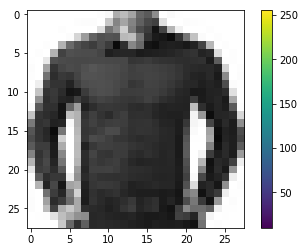

Bag
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [90]:
from PIL import Image

size = 28, 28
im = Image.open('bshirt.jpeg').convert('L')
im = im.resize(size, Image.ANTIALIAS)
imarray = np.array([np.array(im)])

plt.figure()
plt.imshow(im)
print(imarray.shape)
plt.colorbar()
plt.grid(False)
plt.show()

imarray = imarray.reshape(imarray.shape[0], w, h, 1)
predictions = model.predict(imarray)
predicted_label = np.argmax(predictions)
name = class_names[predicted_label]
print (name)
print (predictions)

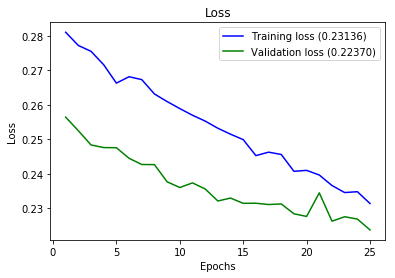

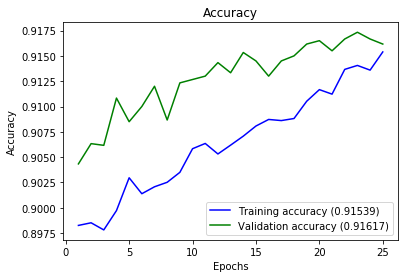

In [97]:
plot_history(history)